In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import Image

# Photos of the setup

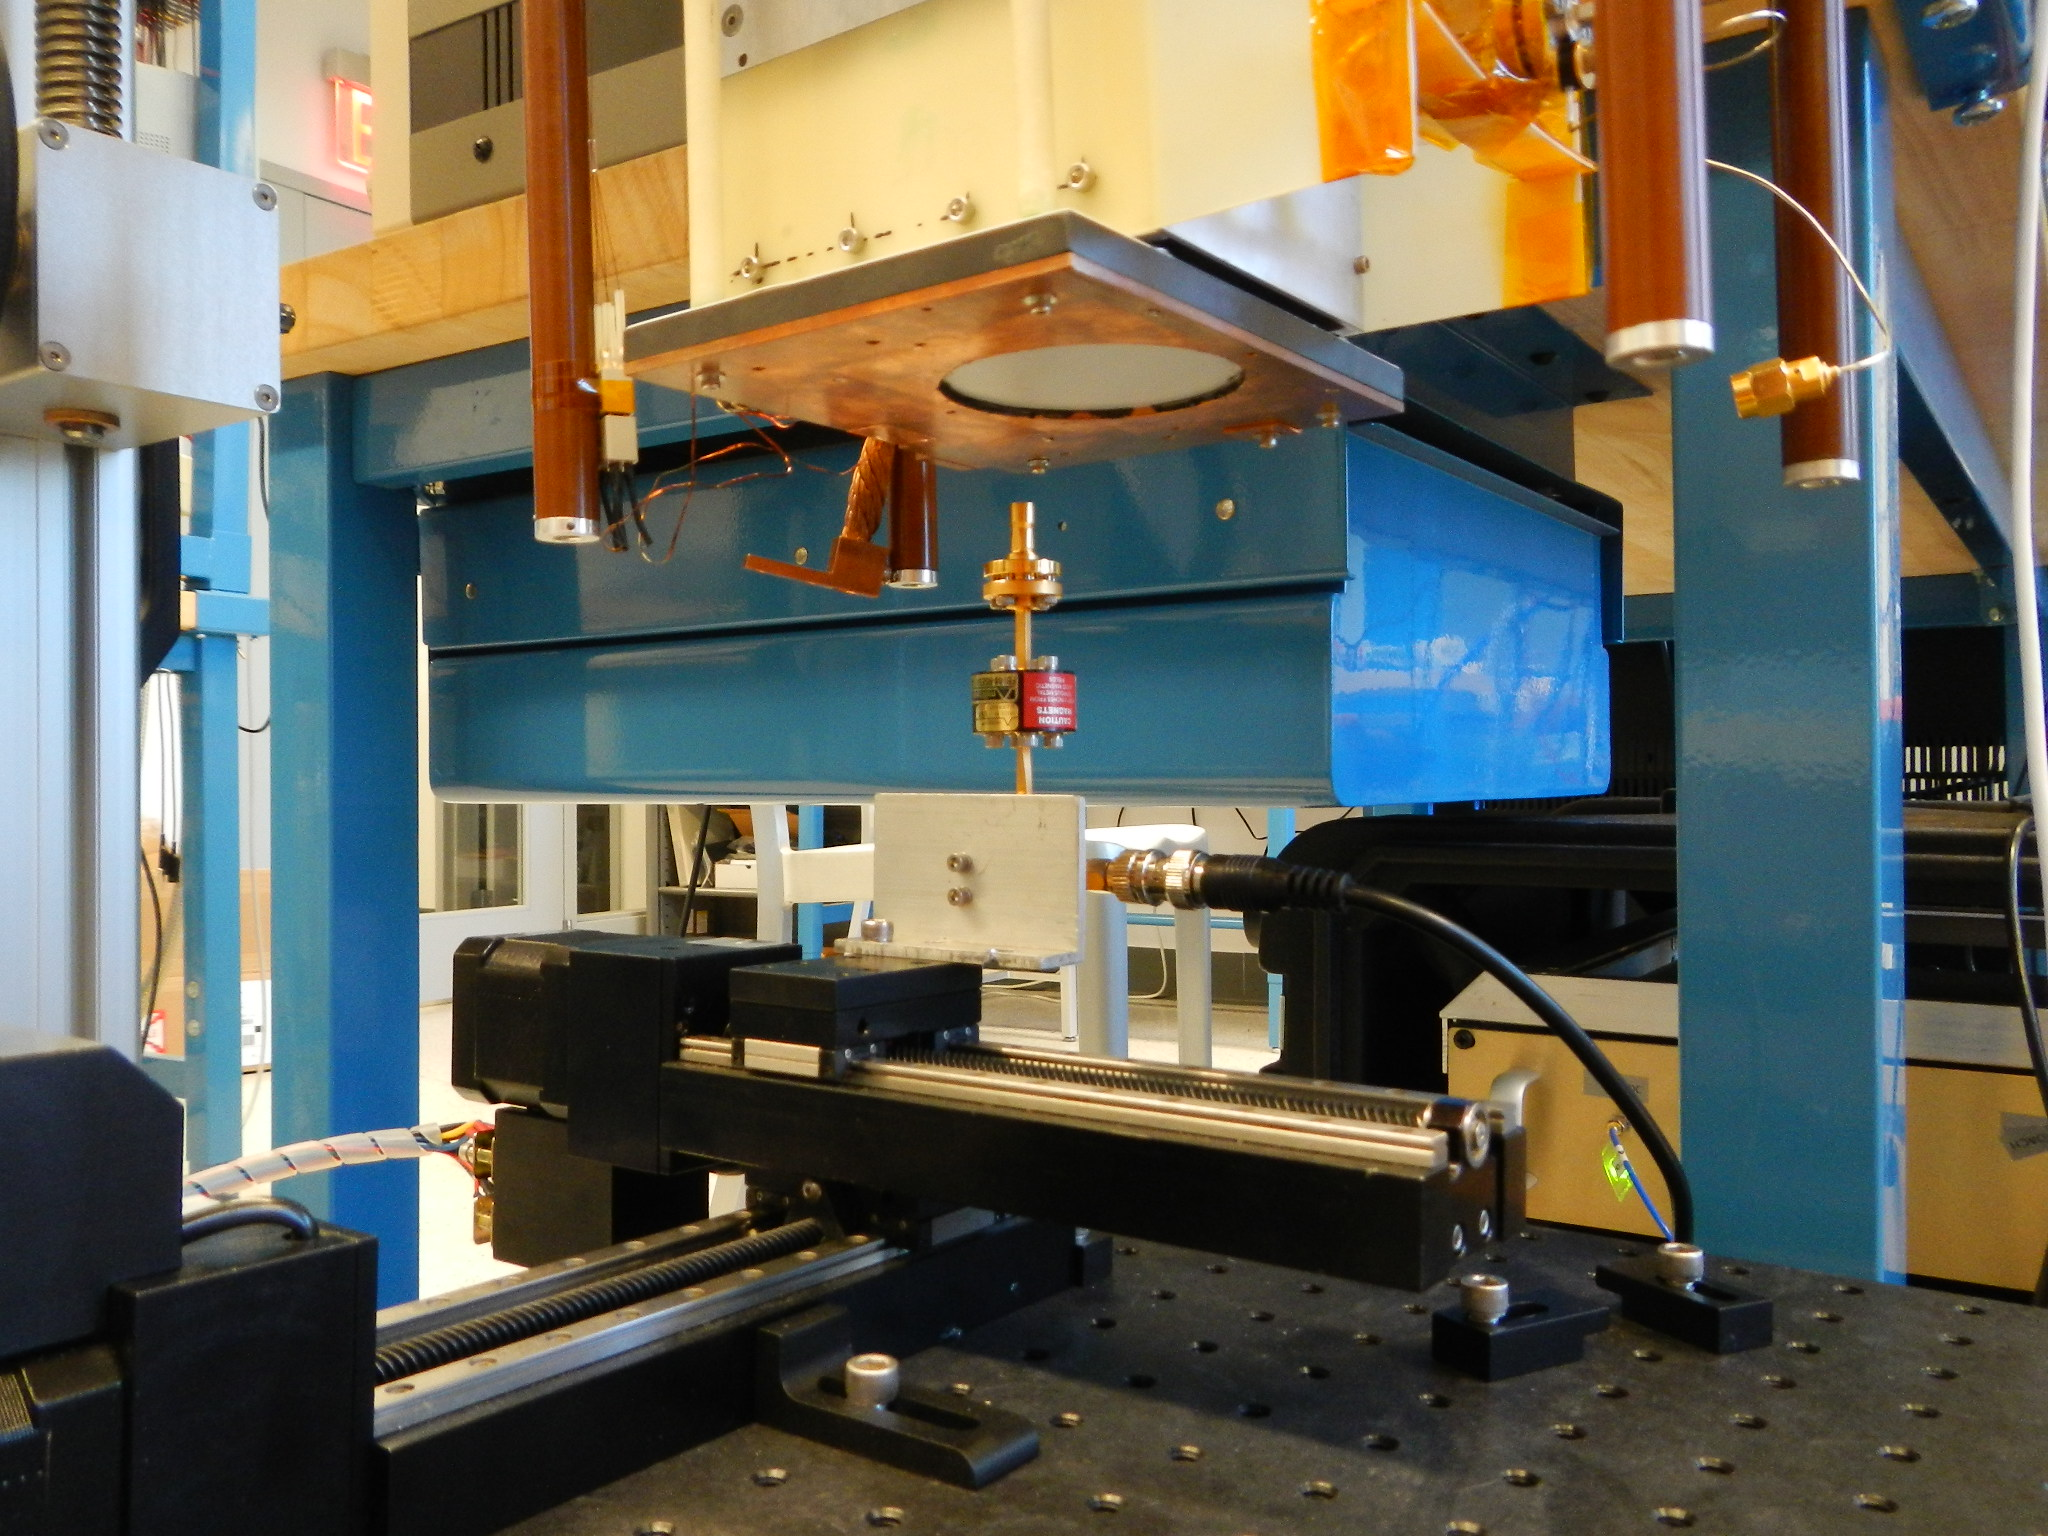

In [3]:
Image(url='https://www.dropbox.com/s/jrhlk1ngr533gs2/DSCN0677.JPG?dl=1&blah=.jpg',embed=True,format='jpg',width=800)

#$50 Two-axis stepper controller

Arduino + two X-NUCLEO-IHM01A1

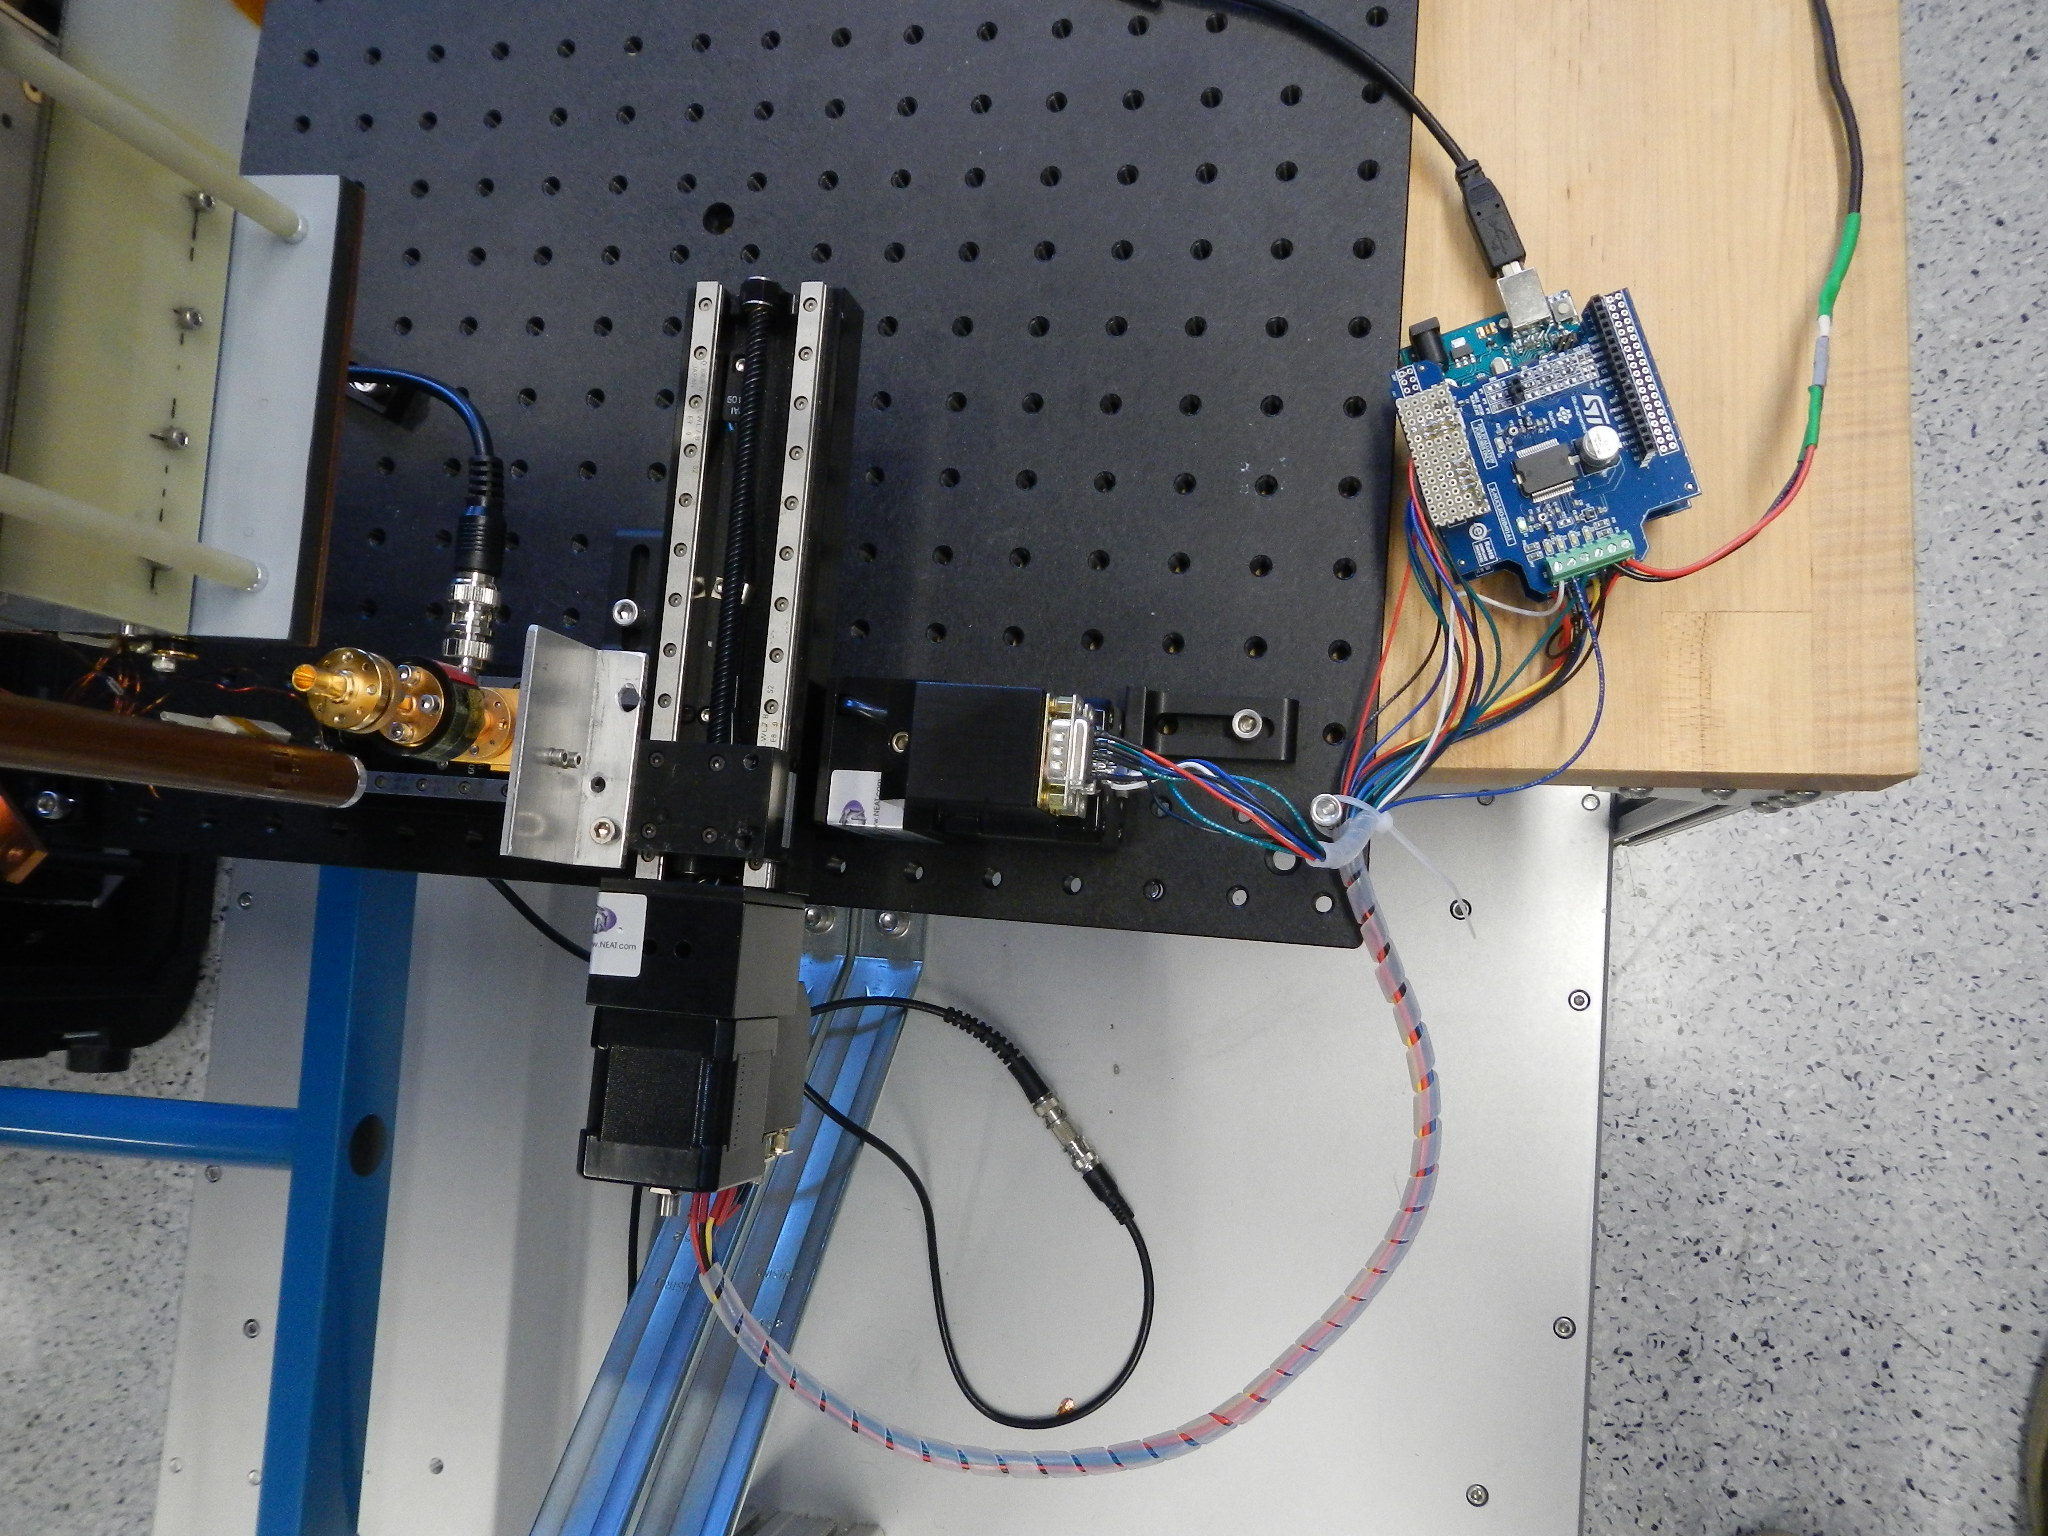

In [4]:
Image(url='https://www.dropbox.com/s/3bz9538qaxsz5jp/DSCN0679.JPG?dl=1&blah=.jpg',embed=True,format='jpg',width=800)

#Custom 4.8 mm diameter WR-6 horn, isolator, zero-bias detector

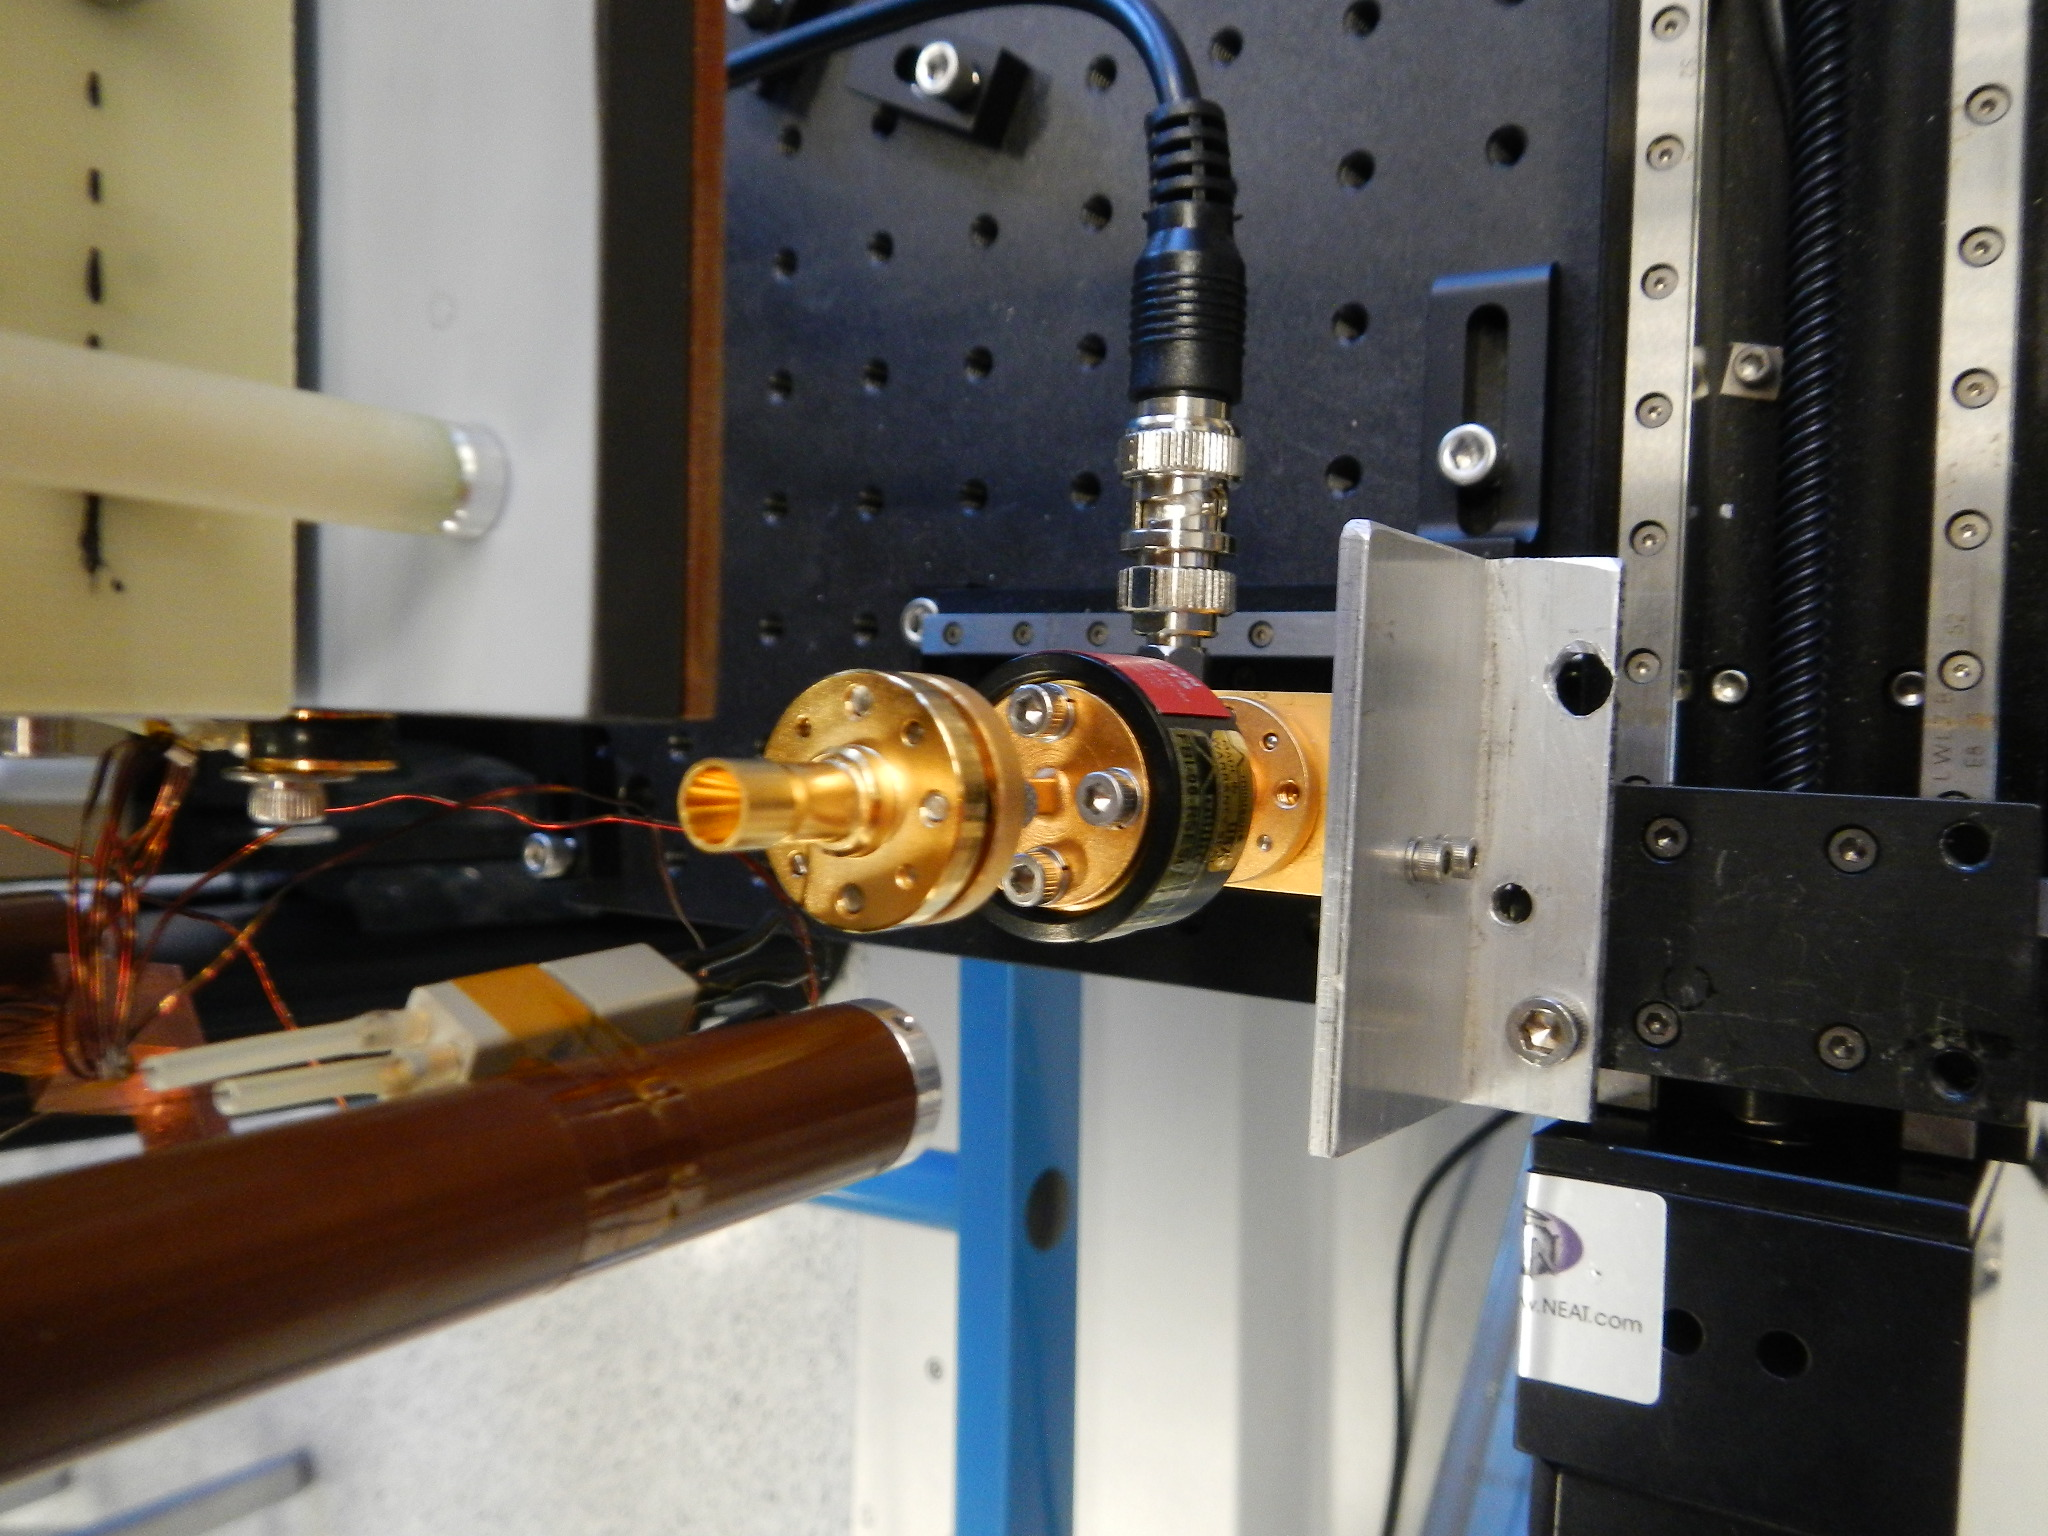

In [5]:
Image(url='https://www.dropbox.com/s/j3eblodzeel4bcg/DSCN0680.JPG?dl=1&blah=.jpg',embed=True,format='jpg',width=800)

In [6]:
import kid_readout.analysis.resources.skip5x4

In [7]:
kid_readout.analysis.resources.skip5x4.coordinate_array.shape

(20, 2)

In [8]:
rcParams['font.size']=24.0

In [18]:
def plot_power(Pr,extent=[-50,50,-50,50], xoffset=6.0, yoffset=0.0,normalize=True,mindB=-20):
    figure(figsize=(12,12))
    dB = 10*np.log10(np.abs(Pr))
    maxdB = dB.max()
    if normalize:
        dB = dB-maxdB
        maxdB=0
    CS = contour(dB,extent=extent,levels=np.linspace(maxdB-10,maxdB,11),cmap=cm.hsv)
    clabel(CS,[maxdB-3,maxdB-6,maxdB-9],colors='m',fmt='%.1f dB')
    imshow(dB,extent=extent,cmap=cm.cubehelix,vmax=maxdB,vmin=maxdB+mindB, interpolation='none',origin='lower')
    ax = gca()
    hole = Circle((0,0),radius=65./2,fill=False,lw=2,edgecolor='r',axes=ax,transform=ax.transData)
    ax.add_artist(hole)
    for k in range(20):
        rawx,rawy = kid_readout.analysis.resources.skip5x4.coordinate_array[k,:]
        x = (rawx - 2)*4.6 +xoffset
        y = (rawy - 2)*4.8 +yoffset
        #x,y = y,x
        horn = Circle((x,y),radius=4.8/2,fill=False,lw=2,edgecolor='b',axes=ax,transform=ax.transData)
        ax.add_artist(horn)
    #draw()
#    xlim(-30,30)
#    ylim(-30,30)
    cb = colorbar()
    cb.set_label('dB')
    cb.add_lines(CS)
    ax.set_ylabel('mm')
    ax.set_xlabel('mm')
    ax.plot([0],[0],'kx',mew=2)
    fig = gcf()
    return fig

In [11]:
import netCDF4

In [12]:
nc = netCDF4.Dataset('/data/readout/beams/2015-06-23_165122.nc')

In [13]:
group = nc.groups[nc.groups.keys()[0]]

In [14]:
z = group.variables['z'][:]

In [15]:
fr = group.variables['frequency'][:]

#Zoomed in plots
Alignment is approximate, not yet aligned using measured data

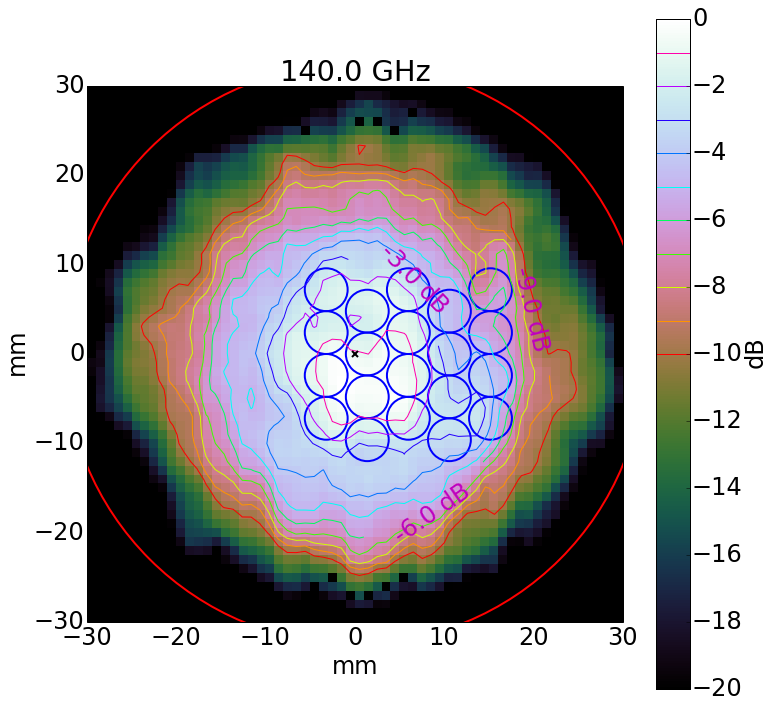

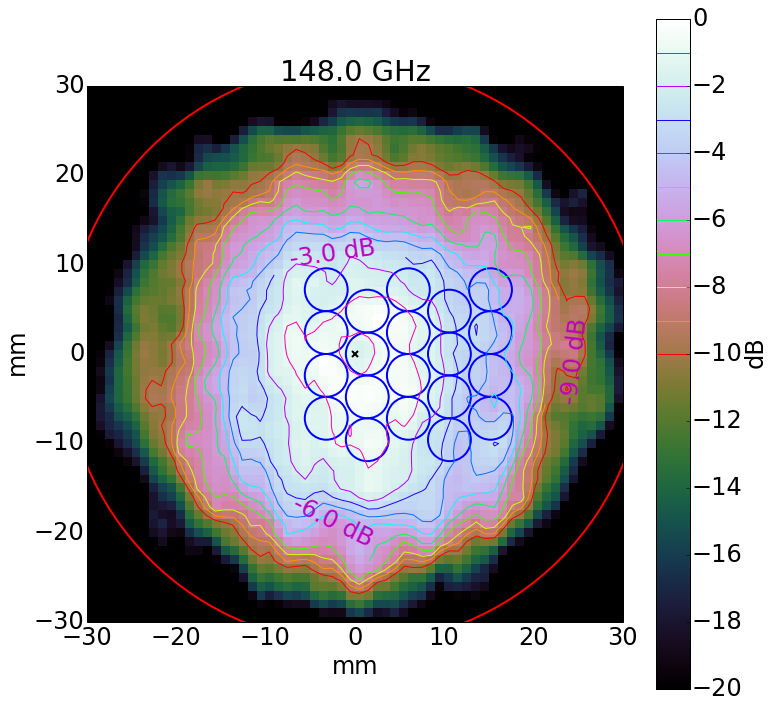

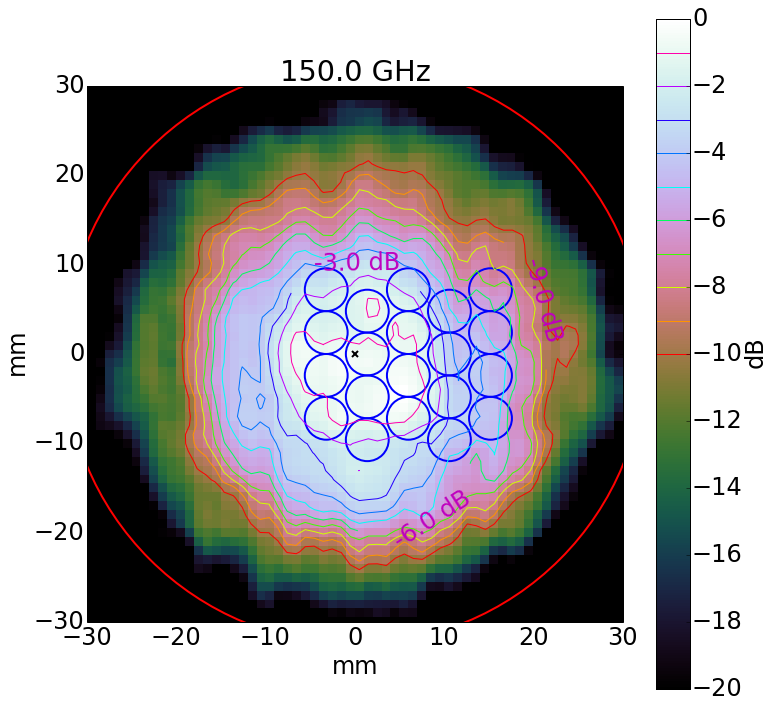

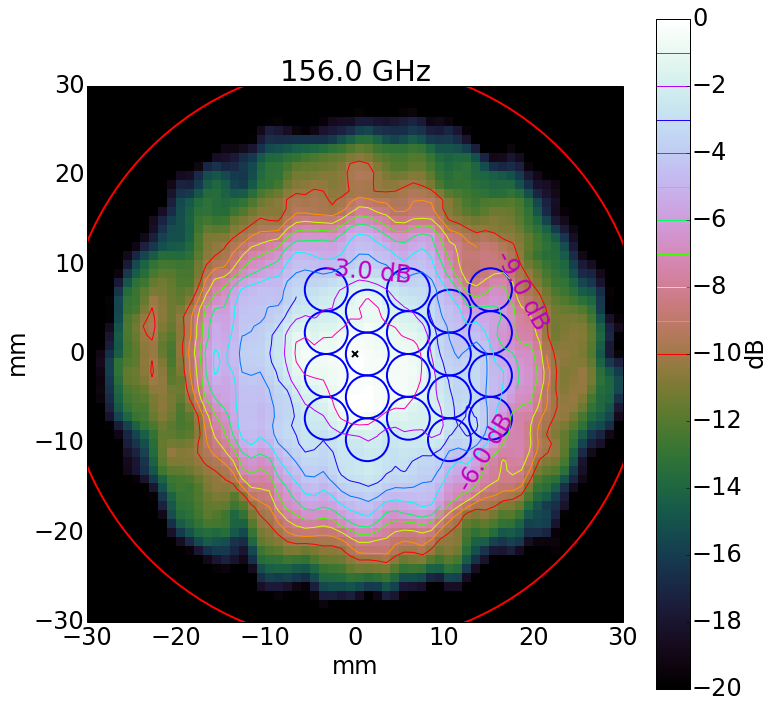

In [16]:
for k in range(z.shape[-1]):
    plot_power(z[:,:,k],extent=[-z.shape[1]/2.,z.shape[1]/2.,-z.shape[0]/2.-7,z.shape[0]/2.-7])
    xlim(-30,30)
    ylim(-30,30)
    title('%.1f GHz' % (fr[k]/1e9))

#Full plots
Alignment is approximate, not yet aligned using measured data

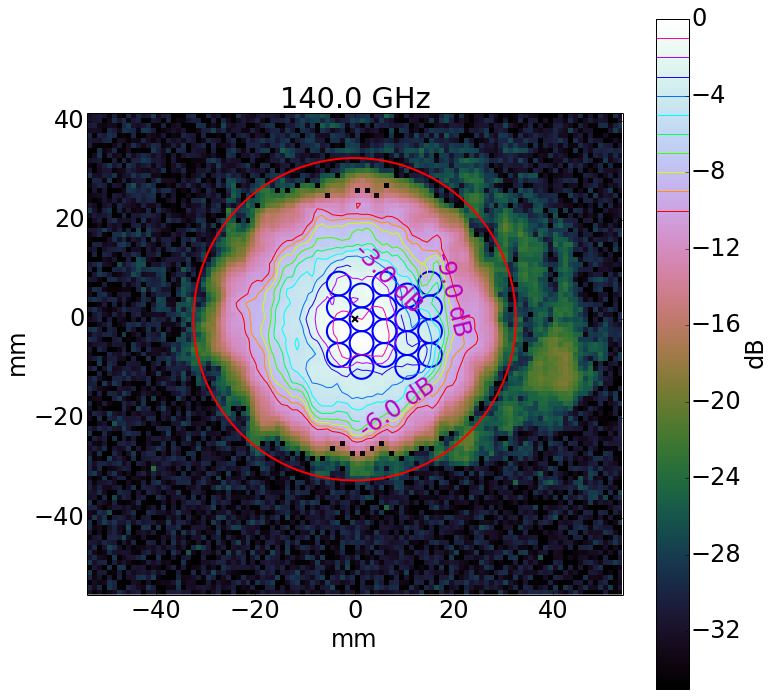

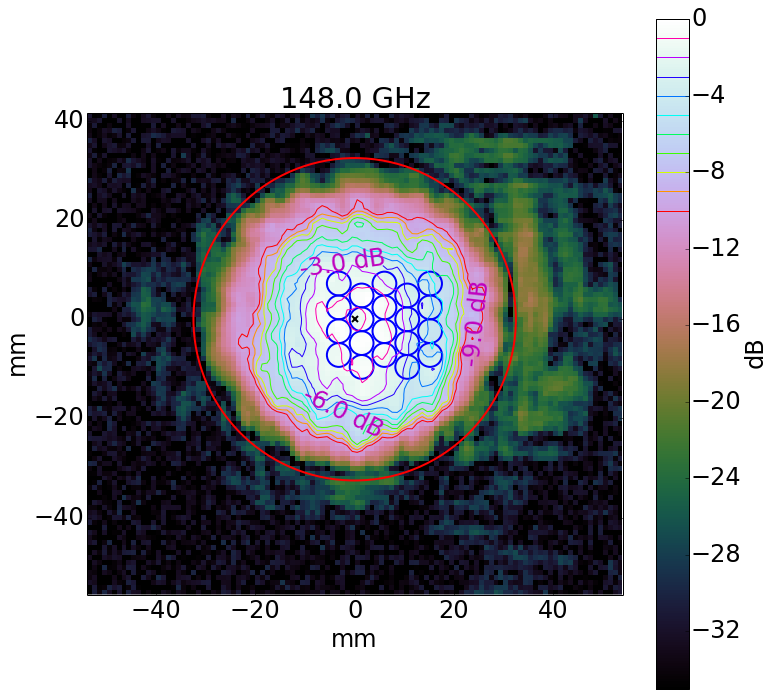

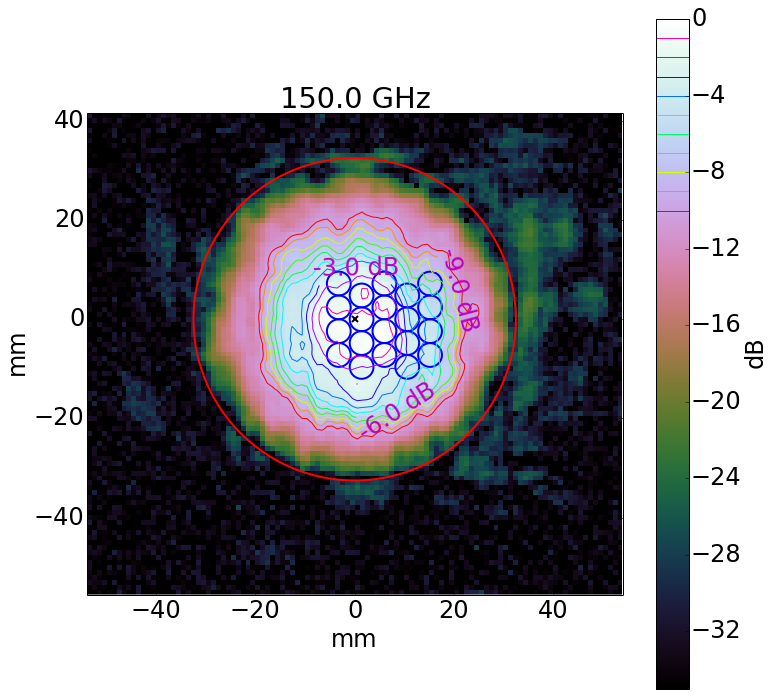

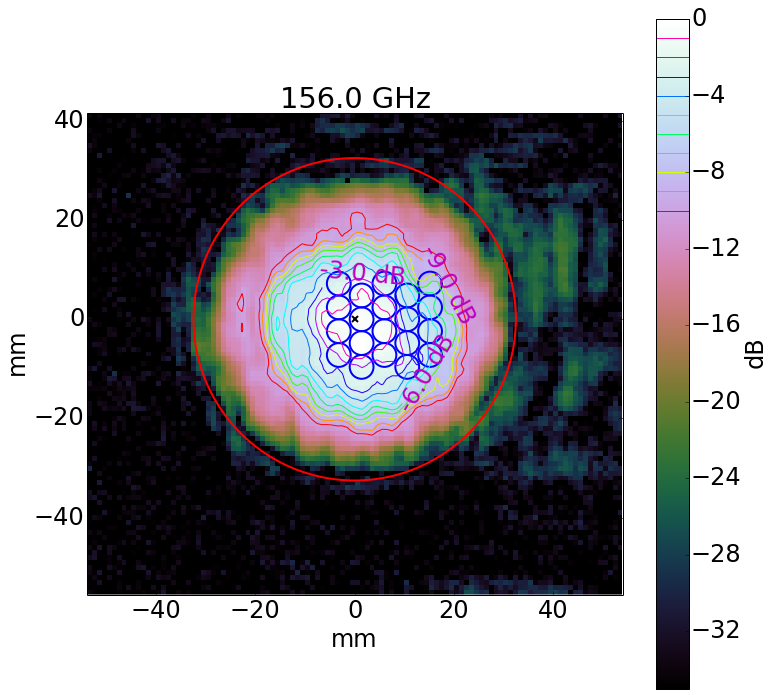

In [26]:
for k in range(z.shape[-1]):
    plot_power(z[:,:,k],extent=[-z.shape[1]/2.,z.shape[1]/2.,-z.shape[0]/2.-7,z.shape[0]/2.-7],mindB=-35)
    title('%.1f GHz' % (fr[k]/1e9))